# **Neda Yousefi**

# Presentation

# Based on Deep reinforcement Learning Hands on (Maxim lapan)-Chapter 6


# **Deep Q-learning**

The Q-learning method can struggle with situations when the count of the
observable set of states is very large.

# **The first solution/ algorithm for Q-Learning**

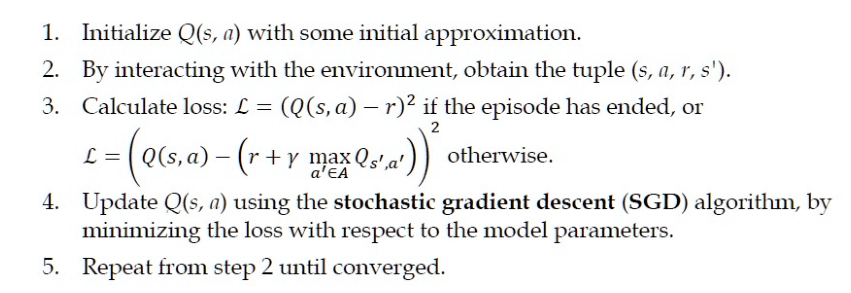

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
img = plt.figure(figsize=(15, 15))
img = "/content/1.jpg"
img = cv2.imread(img) # reads image
plt.imshow(img)

plt.axis('off')
plt.grid(False)

# **The preceding algorithm looks simple, but, unfortunately, it won't work very well**


# 1.   **Interaction with the environment**
random behavior is better at the beginning of the training when
our Q approximation is bad, as it gives us more uniformly distributed information about the environment states. As our training progresses, random behavior becomes inefficient, and we want to fall back to our Q approximation to decide how to act.A method that performs such a mix of two extreme behaviors is known as an epsilon-greedy method, which just means switching between random and Q policy using the probability hyperparameter ϵ. By varying ϵ , we can select the ratio of random actions. The usual practice is to start with ϵ = 1.0 (100% random actions) and slowly decrease it to some small value, such as 5% or 2% random actions. 
# 2.   **(stochastic gradient descent)SGD optimization**
The core of above-mentioned Q-learning procedure is borrowed from supervised learning. Indeed,we are trying to approximate a complex, nonlinear function, Q(s, a), with an NN. To do this, we must calculate targets for this function using the Bellman equation and then pretend that we have a supervised learning problem at hand. One of the fundamental requirements for SGD optimization is that the training data is independent and identically distributed.
But here, Our samples are not independent and also Distribution of our training data won't be identical to samples provided by the optimal policy that we want to learn.
To deal with this, we usually need to use a large buffer of our past
experience and sample training data from it, instead of using our latest experience. This technique is called **replay buffer**. The simplest implementation is a buffer of fixed size, with new data added to the end of the buffer so that it pushes the oldest experience out of it. Replay buffer allows us to train on more-or-less independent data, but the data will
still be fresh enough to train on samples generated by our recent policy.

# 3.   **Correlation between steps**
Another practical issue with the default training procedure is also related to the lack of (independent and identically distributed)i.i.d data.
The Bellman equation provides us with the value of Q(s, a) via Q(s', a'). However, both the states s and s' have only one step between them. This makes them very similar, and it's very hard for NNs to distinguish between them. When we perform an update of our NN's parameters to make Q(s, a) closer to the desired result, we can indirectly alter the value produced for Q(s', a') and other states nearby. This can make our training very unstable, like chasing our own tail: when we update Q for state s, then on subsequent states we will discover that Q(s', a') becomes worse, but attempts to update it can spoil our Q(s, a) approximation, and so on. To make training more stable, there is a trick, called target network, by which we keep a copy of our network and use it for the Q(s', a') value in the Bellman equation. This network is synchronized with our main network only periodically, for example, once in N steps

# **The final form of DQN training**
The original paper (without target network) was published at the end of 2013
(Playing Atari with Deep Reinforcement Learning, Mnih and others) and used seven games for testing. Later, at the beginning of 2015, a revised version of the article, with 49 different games, was published in Nature (Human-Level Control Through Deep Reinforcement Learning, doi:10.1038/nature14236, Mnih and others).

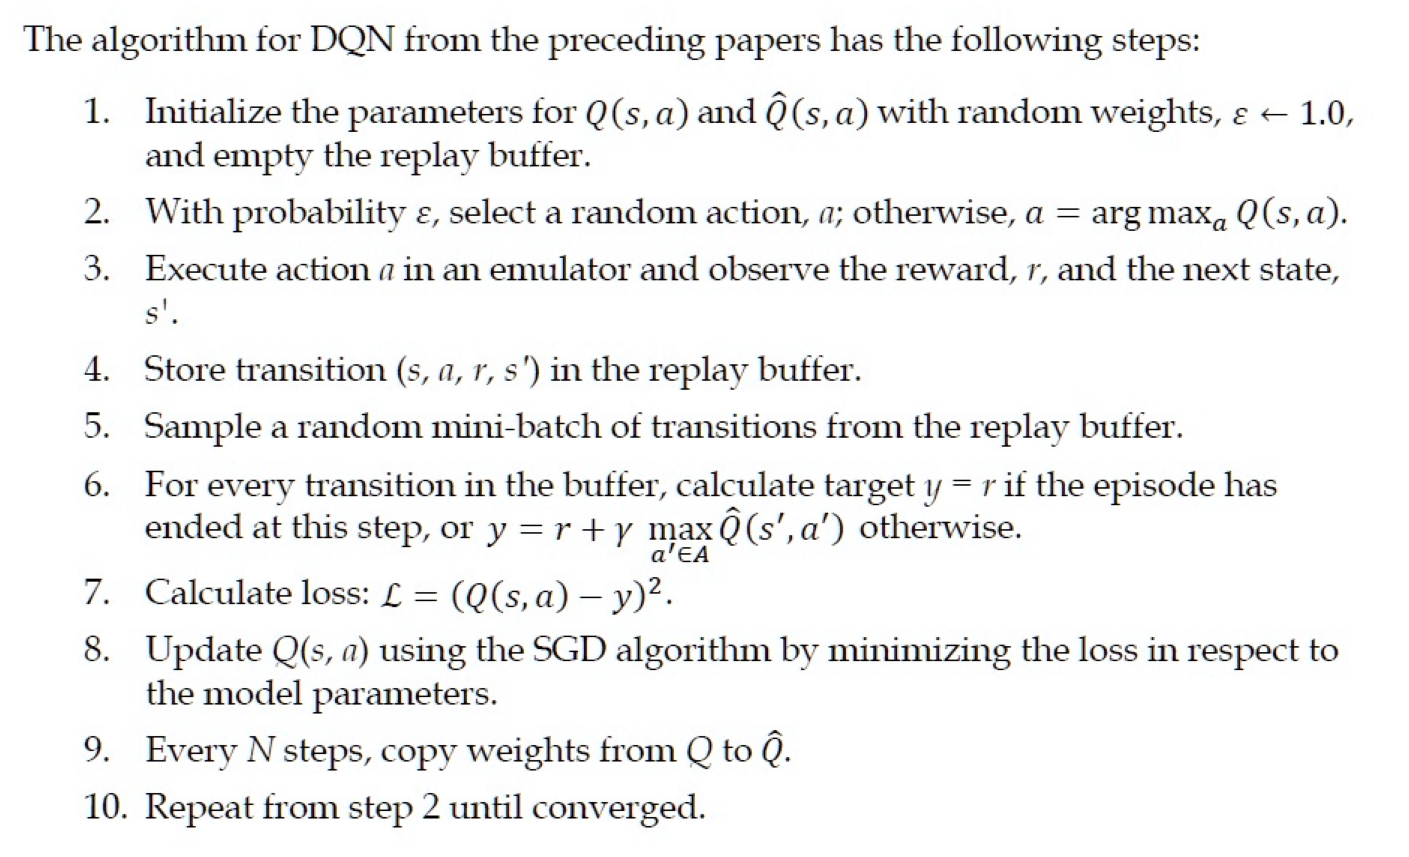

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
img = plt.figure(figsize=(25, 25))
img = "/content/2.jpg"
img = cv2.imread(img) # reads image
plt.imshow(img)

plt.axis('off')
plt.grid(False)

# **Playing Pong**

The following image shows two different situations in a game of Pong. We're
playing against the artificial intelligence (AI) opponent by controlling a paddle (our paddle is on the right, whereas our opponent's is on the left). The objective of the game is to get the bouncing ball past our opponent's paddle, while preventing the ball from getting past our paddle. We can consider the two situations to be completely different: in the right-hand situation, the ball is close to the opponent, so we can relax and watch. However, the situation on the left is more demanding: assuming that the ball is moving from left to right, the ball is moving toward our side, so we need to move our paddle quickly to avoid losing a point. The situations in following Figure are just two from the 1070802 possible situations, but we want our agent to act on them differently.

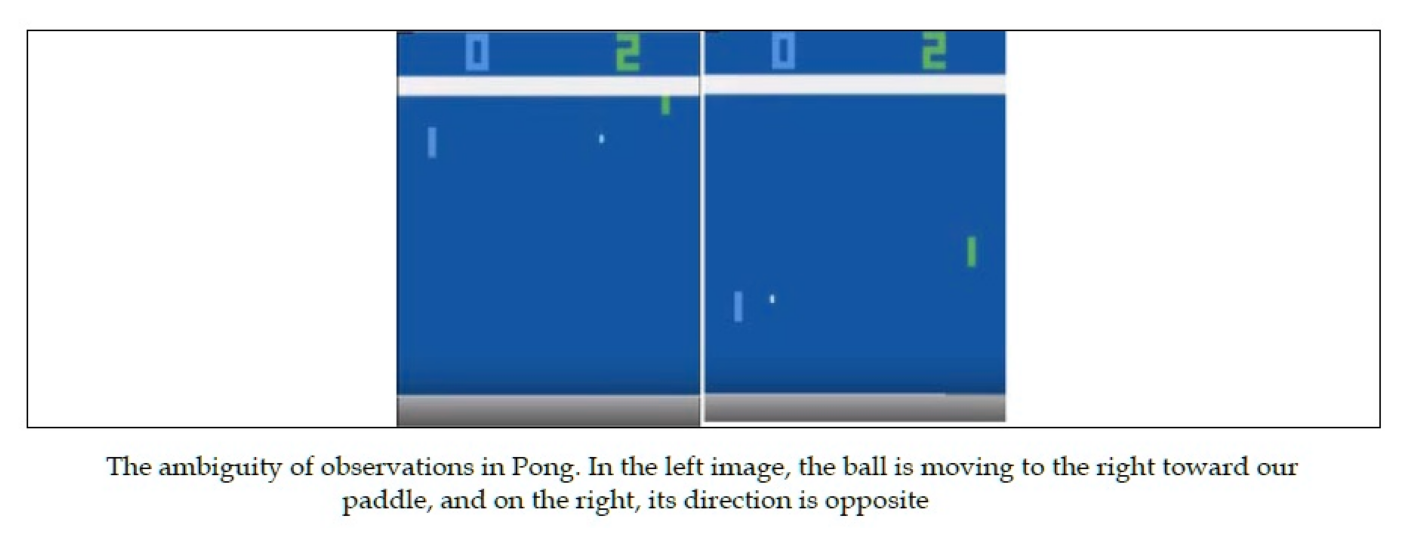

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
img = plt.figure(figsize=(25, 25))
img = "/content/3.jpg"
img = cv2.imread(img) # reads image
plt.imshow(img)

plt.axis('off')
plt.grid(False)

# **This example has been split into three modules due to its length, logical structure, and reusability. The modules are as follows:**
## **• Chapter06/lib/wrappers.py: These are Atari environment wrappers, mostly taken from the OpenAI Baselines project.**
## **• Chapter06/lib/dqn_model.py: This is the DQN NN layer, with the same architecture as the DeepMind DQN from the Nature paper.**
## **• Chapter06/02_dqn_pong.py: This is the main module, with the training loop, loss function calculation, and experience replay buffer.**

# **First Part: Wrappers**
The list of the most popular Atari transformations used by RL researchers includes:

# **1.   Converting individual lives in the game into separate episodes.**
 In general, an episode contains all the steps from the beginning of the game until the "Game over" screen appears, which can last for thousands of game
steps (observations and actions). Usually, in arcade games, the player
is given several lives, which provide several attempts in the game. This
transformation splits a full episode into individual small episodes for every
life that a player has. Not all games support this feature (for example, Pong
doesn't), but for the supported environments, it usually helps to speed up
convergence, as our episodes become shorter.

# **2.   Making an action decision every K steps, where K is usually 4 or 3.** 
On intermediate frames, the chosen action is simply repeated. This allows
training to speed up significantly, as processing every frame with an NN is
quite a demanding operation, but the difference between consequent frames
is usually minor.

#**3. Pressing FIRE at the beginning of the game.**
Some games (including Pong) require a user to press the FIRE button to start the game. Without this, the environment becomes a POMDP, as from observation, an agent cannot tell whether FIRE was already pressed.

# **4.Scaling every frame down from 210×160, with three color frames, to a single-color 84×84 image.**
 Different approaches are possible. For example, the DeepMind
paper describes this transformation as taking the Y-color channel from the
YCbCr color space and then rescaling the full image to an 84×84 resolution.
Some other researchers do grayscale transformation, cropping non-relevant
parts of the image and then scaling down. In the Baselines repository (and in
the following example code), the latter approach is used.

# **5.Clipping the reward to –1, 0, and 1 values.**
The obtained score can vary wildly among the games. For example, in Pong you get a score of 1 for every ball that your opponent passes behind you. However, in some games, like KungFuMaster, you get a reward of 100 for every enemy killed. This spread in reward values makes our loss have completely different scales between the games, which makes it harder to find common hyperparameters for a set of games. To fix this, the reward just gets clipped to the range [–1...1].

# **6.Converting observations from unsigned bytes to float32 values.**
 The screen obtained from the emulator is encoded as a tensor of bytes with values from 0 to 255, which is not the best representation for an NN. So, we need to convert the image into floats and rescale the values to the range 
 [0.0…1.0].



# **Import Required Libraries**

In [ ]:
import cv2
import gym
import gym.spaces
import numpy as np
import collections

**This wrapper presses the FIRE button in environments** that require that
for the game to start. In addition to pressing FIRE, this wrapper checks for several corner cases that are present in some games.

In [ ]:
class FireResetEnv(gym.Wrapper):
    def __init__(self, env=None):
        """For environments where the user need to press FIRE for the game to start."""
        super(FireResetEnv, self).__init__(env)
        assert env.unwrapped.get_action_meanings()[1] == 'FIRE'
        assert len(env.unwrapped.get_action_meanings()) >= 3

    def step(self, action):
        return self.env.step(action)

    def reset(self):
        self.env.reset()
        obs, _, done, _ = self.env.step(1)
        if done:
            self.env.reset()
        obs, _, done, _ = self.env.step(2)
        if done:
            self.env.reset()
        return obs

 **This wrapper combines the repetition of actions during K frames and pixels from two consecutive frames.**
The Gym library provides environments that have NoFrameskip in their ID. The action sent to the environment is repeatedly performed for a duration of n frames, where n is uniformly sampled from (2, 3, 4). If we want to step through the environment at a specific rate, we can use the Gym Atari environments with
NoFrameskip in their ID, which will step through the underlying environment
without any alteration to the step duration. The step rate, in this case, it is 60 frames per second. We can then customize the environment to skip at our choice to skip the rate (k) to step at a specific rate. we are also taking the maximum of the pixel values over the frames that were skipped and sending that as the observation instead of totally ignoring all the intermediate image frames that were skipped.

In [ ]:
class MaxAndSkipEnv(gym.Wrapper):
    def __init__(self, env=None, skip=4):
        """Return only every `skip`-th frame"""
        super(MaxAndSkipEnv, self).__init__(env)
        # most recent raw observations (for max pooling
        # across time steps)A double-ended queue, or deque,
        # has the feature of adding and removing elements from either end.
        # The Deque module is a part of collections library. 
        #It has the methods for adding and removing elements which can be invoked directly with arguments
        self._obs_buffer = collections.deque(maxlen=2)
        self._skip = skip

    def step(self, action):
        total_reward = 0.0
        done = None
        for _ in range(self._skip):
            obs, reward, done, info = self.env.step(action)
            self._obs_buffer.append(obs)
            total_reward += reward
            if done:
                break
        max_frame = np.max(np.stack(self._obs_buffer), axis=0)
        return max_frame, total_reward, done, info

    def reset(self):
        """Clear past frame buffer and init. to first obs. from inner env."""
        self._obs_buffer.clear()
        obs = self.env.reset()
        self._obs_buffer.append(obs)
        return obs


**The goal of this wrapper is to convert input observations from the emulator, which normally has a resolution of 210×160 pixels with RGB color channels, to a grayscale 84×84 image.**
Lower resolution means less data to be processed by the agent at every step, which translates to faster training time, especially on consumer grade computing hardware that we own.
It does this using a colorimetric grayscale conversion (which is closer
to human color perception than a simple averaging of color channels), resizing the image, and cropping the top and bottom parts of the result.


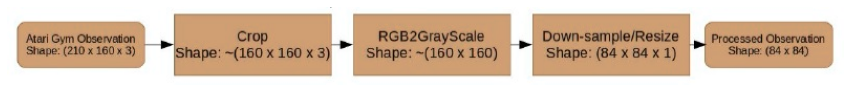

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
img = plt.figure(figsize=(15, 15))
img = "/content/4.jpg"
img = cv2.imread(img) # reads image
plt.imshow(img)

plt.axis('off')
plt.grid(False)

In [ ]:
class ProcessFrame84(gym.ObservationWrapper):
    def __init__(self, env=None):
        super(ProcessFrame84, self).__init__(env)
        self.observation_space = gym.spaces.Box(
            low=0, high=255, shape=(84, 84, 1), dtype=np.uint8)

    def observation(self, obs):
        return ProcessFrame84.process(obs)

    
    def process(frame):
        if frame.size == 210 * 160 * 3:
            img = np.reshape(frame, [210, 160, 3]).astype(
                np.float32)
        elif frame.size == 250 * 160 * 3:
            img = np.reshape(frame, [250, 160, 3]).astype(
                np.float32)
        else:
            assert False, "Unknown resolution."
            #rgb2gray(rgb)
        img = img[:, :, 0] * 0.299 + img[:, :, 1] * 0.587 + \
              img[:, :, 2] * 0.114
        resized_screen = cv2.resize(
            img, (84, 110), interpolation=cv2.INTER_AREA)
        x_t = resized_screen[18:102, :]
        x_t = np.reshape(x_t, [84, 84, 1])
        return x_t.astype(np.uint8)

**This class creates a stack of subsequent frames along the first dimension and returns them as an observation.**
The purpose is to give the network an idea about the dynamics of the objects, such as the speed and direction of the ball in Pong or how enemies are moving. This is very important information, which it is not possible to obtain from a single image.

In [ ]:
class BufferWrapper(gym.ObservationWrapper):
    def __init__(self, env, n_steps, dtype=np.float32):
        super(BufferWrapper, self).__init__(env)
        self.dtype = dtype
        old_space = env.observation_space
        self.observation_space = gym.spaces.Box(
            old_space.low.repeat(n_steps, axis=0),
            old_space.high.repeat(n_steps, axis=0), dtype=dtype)

    def reset(self):
        self.buffer = np.zeros_like(
            self.observation_space.low, dtype=self.dtype)
        return self.observation(self.env.reset())

    def observation(self, observation):
        self.buffer[:-1] = self.buffer[1:]
        self.buffer[-1] = observation
        return self.buffer

**This simple wrapper changes the shape of the observation from HWC (height, width, channel) to the CHW (channel, height, width) format required by PyTorch.**
The input shape of the tensor has a color channel as the last dimension, but PyTorch's convolution layers assume the color channel to be the first dimension

In [ ]:
class ImageToPyTorch(gym.ObservationWrapper):
    def __init__(self, env):
        super(ImageToPyTorch, self).__init__(env)
        old_shape = self.observation_space.shape
        new_shape = (old_shape[-1], old_shape[0], old_shape[1])
        self.observation_space = gym.spaces.Box(
            low=0.0, high=1.0, shape=new_shape, dtype=np.float32)

    def observation(self, observation):
        return np.moveaxis(observation, 2, 0)

**The final wrapper we have in the library converts observation data from bytes to floats, and scales every pixel's value to the range [0.0...1.0].**

In [ ]:
class ScaledFloatFrame(gym.ObservationWrapper):
    def observation(self, obs):
        return np.array(obs).astype(np.float32) / 255.0

**At the end of the file is a simple function that creates an environment by its name and applies all the required wrappers to it. That's it for wrappers.**

In [ ]:
def make_env(env_name):
    env = gym.make(env_name)
    env = MaxAndSkipEnv(env)
    env = FireResetEnv(env)
    env = ProcessFrame84(env)
    env = ImageToPyTorch(env)
    env = BufferWrapper(env, 4)
    return ScaledFloatFrame(env)

# **Second Part: The DQN model**

The model published in Nature has three convolution layers followed by two
fully connected layers. All layers are separated by rectified linear unit (ReLU)
nonlinearities. The output of the model is Q-values for every action available in the environment, without nonlinearity applied (as Q-values can have any value).
The approach of having all Q-values calculated with one pass through the network
helps us to increase speed significantly in comparison to treating Q(s, a) literally and feeding observations and actions to the network to obtain the value of the action.

To be able to write our network in the generic way, it was implemented in two
parts: **convolution and sequential**. PyTorch doesn't have a "flatter" layer that could transform a 3D tensor into a 1D vector of numbers, with the requirement of feeding convolution output to the fully connected layer. This problem is solved in the **forward() function**, where we can reshape our batch of 3D tensors into a batch of 1D vectors.

Another problem is that we don't know the exact number of values in the
output from the convolution layer produced with the input of the given shape.
However, we need to pass this number to the first fully connected layer constructor.
One possible solution would be to hard-code this number, which is a function of
input shape (for 84×84 input, the output from the convolution layer will have 3136 values); however, it's not the best way, as our code will become less robust to input shape change. 
The better solution would be to have a simple **function, _get_conv_out()**,
that accepts the input shape and applies the convolution layer to a fake
tensor of such a shape. The result of the function would be equal to the number of parameters returned by this application. It would be fast, as this call would be done once on model creation, but also, it would allow us to have generic code.

The final piece of the model is the **forward() function**, which accepts the 4D input tensor. (The first dimension is batch size and the second is the color channel, which is our stack of subsequent frames; the third and fourth are image dimensions.)
The application of transformations is done in two steps: first we apply the
convolution layer to the input, and then we obtain a 4D tensor on output. This
result is flattened to have two dimensions: a batch size and all the parameters
returned by the convolution for this batch entry as one long vector of numbers.
This is done by the **view() function of the tensors**, which lets one single dimension be a -1 argument as a wildcard for the rest of the parameters. For example, if we have a tensor, T, of shape (2, 3, 4), which is a 3D tensor of 24 elements, we can reshape it into a 2D tensor with six rows and four columns using T.view(6, 4). This operation doesn't create a new memory object or move the data in memory; it just changes the higher-level shape of the tensor. The same result could be obtained by T.view(-1, 4) or T.view(6, -1), which is very convenient when your tensor has a batch size in the first dimension. Finally, we pass this flattened 2D tensor to our fully connected layers to obtain Q-values for every batch input.

In [ ]:
import torch
import torch.nn as nn
import numpy as np

In [ ]:
class DQN(nn.Module):
    def __init__(self, input_shape, n_actions):
        super(DQN, self).__init__()

        self.conv = nn.Sequential(
            nn.Conv2d(input_shape[0], 32, kernel_size=8, stride=4),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1),
            nn.ReLU()
        )

        conv_out_size = self._get_conv_out(input_shape)
        self.fc = nn.Sequential(
            nn.Linear(conv_out_size, 512),
            nn.ReLU(),
            nn.Linear(512, n_actions)
        )

    def _get_conv_out(self, shape):
        o = self.conv(torch.zeros(1, *shape))
        return int(np.prod(o.size()))

    def forward(self, x):
        conv_out = self.conv(x).view(x.size()[0], -1)
        return self.fc(conv_out)

# **Third Part: Training**
### The third module contains the experience replay buffer, the agent, the loss function calculation, and the training loop itself.

DeepMind's Nature paper contained a table with all the details about hyperparameters used to train its model on all 49 Atari games used for evaluation. DeepMind kept all those parameters the same for all games (but trained individual models for every game), and it was the team's intention to show that the method is robust enough to solve lots of games with varying complexity, action space, reward structure, and other details using one
single model architecture and hyperparameters. However, our goal here is much
more modest: we want to solve just the Pong game.

Pong is quite simple and straightforward in comparison to other games in the Atari test set, so the hyperparameters in the paper are overkill for our task. For example, to get the best result on all 49 games, DeepMind used a million-observations replay buffer, which requires approximately 20 GB of RAM to keep and lots of samples from the environment to populate.
The epsilon decay schedule that was used is also not the best for a single Pong game.
In the training, DeepMind linearly decayed epsilon from 1.0 to 0.1 during the first million frames obtained from the environment. However, my own experiments
have shown that for Pong, it's enough to decay epsilon over the first 150k frames and then keep it stable. The replay buffer also can be much smaller: 10k transitions will be enough.

# **Import Required Libraries**

In [ ]:
! pip install tensorboardX

     |████████████████████████████████| 125 kB 7.3 MB/s 


In [ ]:
import argparse
import time
import numpy as np
import collections

import torch
import torch.nn as nn
import torch.optim as optim

from tensorboardX import SummaryWriter

**These parameters define the following:**


*   Our gamma value used for Bellman approximation (GAMMA)
*   The batch size sampled from the replay buffer (BATCH_SIZE)
*   The maximum capacity of the buffer (REPLAY_SIZE)
*   The count of frames we wait for before starting training to populate the
replay buffer (REPLAY_START_SIZE)
*   The learning rate used in the Adam optimizer, which is used in this example
(LEARNING_RATE)
*   How frequently we sync model weights from the training model to the
target model, which is used to get the value of the next state in the Bellman
approximation (SYNC_TARGET_FRAMES)

**The last batch of hyperparameters is related to the epsilon decay schedule.**
To achieve proper exploration, we start with epsilon = 1.0 at the early stages of training, which causes all actions to be selected randomly. Then, during the first 150,000 frames, epsilon is linearly decayed to 0.01, which corresponds to the random action taken in 1% of steps. A similar scheme was used in the original DeepMind paper,but the duration of decay was almost 10 times longer (so, epsilon = 0.01 was reached after a million frames).

In [ ]:
DEFAULT_ENV_NAME = "PongNoFrameskip-v4"
MEAN_REWARD_BOUND = 19

GAMMA = 0.99
BATCH_SIZE = 32
REPLAY_SIZE = 10000
LEARNING_RATE = 1e-4
SYNC_TARGET_FRAMES = 1000
REPLAY_START_SIZE = 10000

EPSILON_DECAY_LAST_FRAME = 150000
EPSILON_START = 1.0
EPSILON_FINAL = 0.01


**The next chunk of code defines our experience replay buffer, the purpose of which is to keep the transitions obtained from the environment (tuples of the observation, action, reward, done flag, and the next state).**
 Each time we do a step in the environment, we push the transition into the buffer, keeping only a fixed number of steps (in our case, 10k transitions). For training, we randomly sample the batch of transitions from the replay buffer, which allows us to break the correlation between subsequent steps in the environment.

Experience replay buffer code basically exploits the capability of the deque class to maintain the given number of entries in the buffer. In the sample() method, we create a list of random indices and then repack the sampled entries into NumPy arrays for more convenient loss calculation.

In [ ]:
Experience = collections.namedtuple(
    'Experience', field_names=['state', 'action', 'reward',
                               'done', 'new_state'])

class ExperienceBuffer:
    def __init__(self, capacity):
        self.buffer = collections.deque(maxlen=capacity)

    def __len__(self):
        return len(self.buffer)

    def append(self, experience):
        self.buffer.append(experience)

    def sample(self, batch_size):
        indices = np.random.choice(len(self.buffer), batch_size,
                                   replace=False)
        states, actions, rewards, dones, next_states = \
            zip(*[self.buffer[idx] for idx in indices])
        return np.array(states), np.array(actions), \
               np.array(rewards, dtype=np.float32), \
               np.array(dones, dtype=np.uint8), \
               np.array(next_states)

**The next class we need to have is an Agent, which interacts with the environment and saves the result of the interaction into the experience replay buffer**
During the agent's initialization, we need to store references to the environment and experience replay buffer, tracking the current observation and the total reward accumulated so far.
The main method of the agent is to **perform a step** in the environment and store its result in the buffer. To do this, we need to select the action first. With the probability epsilon (passed as an argument), we take the random action; otherwise, we use the past model to obtain the Q-values for all possible actions and choose the best.
As the action has been chosen, we pass it to the environment to get the next
observation and reward, store the data in the experience buffer, and then handle
the end-of-episode situation. The result of the function is the total accumulated reward if we have reached the end of the episode with this step, or None if not.

In [ ]:
class Agent:
    def __init__(self, env, exp_buffer):
        self.env = env
        self.exp_buffer = exp_buffer
        self._reset()

    def _reset(self):
        self.state = env.reset()
        self.total_reward = 0.0

    
    def play_step(self, net, epsilon=0.0, device="cpu"):
        done_reward = None

        if np.random.random() < epsilon:
            action = env.action_space.sample()
        else:
            state_a = np.array([self.state], copy=False)
            state_v = torch.tensor(state_a).to(device)
            q_vals_v = net(state_v)
            _, act_v = torch.max(q_vals_v, dim=1)
            action = int(act_v.item())

        # do step in the environment
        new_state, reward, is_done, _ = self.env.step(action)
        self.total_reward += reward

        exp = Experience(self.state, action, reward,
                         is_done, new_state)
        self.exp_buffer.append(exp)
        self.state = new_state
        if is_done:
            done_reward = self.total_reward
            self._reset()
        return done_reward

Now it is time for the last function in the training module, which calculates the loss for the sampled batch. This function is written in a form to maximally exploit GPU parallelism by processing all batch samples with vector operations, which makes it harder to understand when compared with a naïve loop over the batch. Yet this optimization pays off: the parallel version is more than two times faster than an explicit loop over the batch.
As a reminder, here is the loss expression we need to calculate:

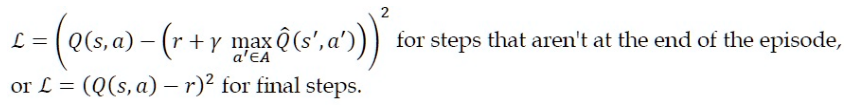

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
img = plt.figure(figsize=(15, 15))
img = "/content/5.jpg"
img = cv2.imread(img) # reads image
plt.imshow(img)

plt.axis('off')
plt.grid(False)

### In arguments, we pass our batch as a tuple of arrays (repacked by the sample() method in the experience buffer), our network that we are training, and the target network, which is periodically synced with the trained one.
The first model (passed as the argument network) is used to calculate gradients;
the second model in the tgt_net argument is used to calculate values for the next states, and this calculation shouldn't affect gradients. To achieve this, we use the detach() function of the PyTorch tensor to prevent gradients from flowing into the target network's graph.

we pass observations to the first model and extract the
specific Q-values for the taken actions using the **gather() tensor operation**. The first argument to the gather() call is a dimension index that we want to perform gathering on (in our case, it is equal to 1, which corresponds to actions).
The second argument is a tensor of indices of elements to be chosen. Extra
unsqueeze() and squeeze() calls are required to compute the index argument
for the gather functions, and to get rid of the extra dimensions that we created,respectively. (The index should have the same number of dimensions as the data webare processing.) 
Keep in mind that the result of gather() applied to tensors is a differentiable
operation that will keep all gradients with respect to the final loss value.

**tgt_net**: we apply the target network to our next state observations
and calculate the maximum Q-value along the same action dimension, 1. Function
max() returns both maximum values and indices of those values (so it calculates
both max and argmax), which is very convenient. However, in this case, we are
interested only in values, so we take the first entry of the result.

**next_state_values[done_mask] = 0.0** If transition in the batch is from the last step in the episode, then our value of the action doesn't have a discounted reward of the next state, as there is no next state from which to gather the reward. This may look minor, but it is very important in practice: without this,training will not converge.

**next_state_values.detach()** we detach the value from its computation graph to prevent gradients from flowing into the NN used to calculate Q approximation for the next states.This is important, as without this, our backpropagation of the loss will start to affect both predictions for the current state and the next state. However, we don't want to touch predictions for the next state, as they are used in the Bellman equation to calculate reference Q-values. To block gradients from flowing into this branch of the graph, we are using the detach() method of the tensor, which returns the tensor without connection to its calculation history.
Finally, we calculate the Bellman approximation value and the mean squared error
loss. This ends our loss function calculation.

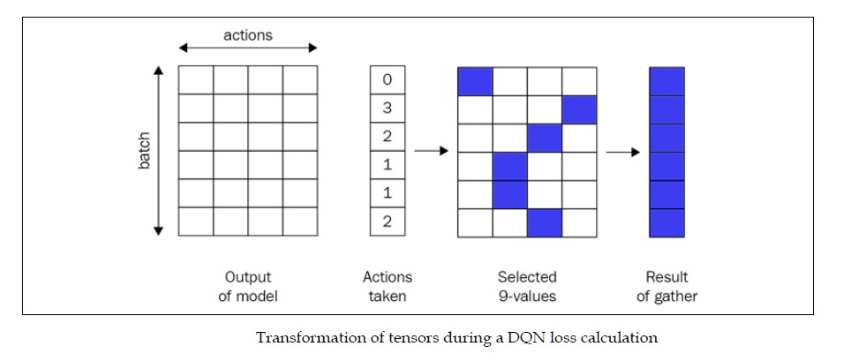

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
img = plt.figure(figsize=(15, 15))
img = "/content/6.jpg"
img = cv2.imread(img) # reads image
plt.imshow(img)

plt.axis('off')
plt.grid(False)

In [ ]:
def calc_loss(batch, net, tgt_net, device="cpu"):
    states, actions, rewards, dones, next_states = batch

    states_v = torch.tensor(np.array(
        states, copy=False)).to(device)
    next_states_v = torch.tensor(np.array(
        next_states, copy=False)).to(device)
    actions_v = torch.tensor(actions).to(device)
    rewards_v = torch.tensor(rewards).to(device)
    done_mask = torch.BoolTensor(dones).to(device)

    state_action_values = net(states_v).gather(
        1, actions_v.unsqueeze(-1)).squeeze(-1)
    with torch.no_grad():
        next_state_values = tgt_net(next_states_v).max(1)[0]
        next_state_values[done_mask] = 0.0
        next_state_values = next_state_values.detach()

    expected_state_action_values = next_state_values * GAMMA + \
                                   rewards_v
    return nn.MSELoss()(state_action_values,
                        expected_state_action_values)

**Training**


*   To begin with, we create a parser of command-line arguments. Our script allows us to enable CUDA and train on environments that are different from the default.
*   Then, we create our environment with all required wrappers applied, the NN that we are going to train, and our target network with the same architecture. In the beginning, they will be initialized with different random weights, but it doesn't matter much, as we will sync them every 1k frames, which roughly corresponds to one episode of Pong.
*   Then we create our experience replay buffer of the required size and pass it to the agent. Epsilon is initially initialized to 1.0, but will be decreased every iteration.

*   The last things we do before the training loop are to create an optimizer, a buffer for full episode rewards, a counter of frames and several variables to track our speed, and the best mean reward reached. Every time our mean reward beats the record, we will save the model in the file.

*   At the beginning of the training loop, we count the number of iterations completed and decrease epsilon according to our schedule. Epsilon will drop linearly during the given number of frames (EPSILON_DECAY_LAST_FRAME=150k) and then be kept on the same level of EPSILON_FINAL=0.01.

*   We report our progress. Specifically, we calculate and show, both in the
console and in TensorBoard, these values: 
• Speed as a count of frames processed per second
• Count of episodes played
• Mean reward for the last 100 episodes
• Current value for epsilon

*   Every time our mean reward for the last 100 episodes reaches a maximum, we
report this and save the model parameters. If our mean reward exceeds the
specified boundary, then we stop training. For Pong, the boundary is 19.0, which
means winning more than 19 from 21 possible games.
*   Then, we check whether our buffer is large enough for training. In the beginning, we should wait for enough data to start, which in our case is 10k transitions. The next condition syncs parameters from our main network to the target network every SYNC_TARGET_FRAMES, which is 1k by default.

*   The last piece of the training loop is very simple but requires the most time to execute: we zero gradients, sample data batches from the experience replay buffer, calculate loss, and perform the optimization step to minimize the loss.



In [ ]:
#XVFB will be launched if you run on a server
import sys, os
if 'google.colab' in sys.modules:
    %tensorflow_version 1.x
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

TensorFlow 1.x selected.
bash: ../xvfb: No such file or directory
env: DISPLAY=:1


In [ ]:
import gym
import gym.spaces

DEFAULT_ENV_NAME = "PongNoFrameskip-v4" 
test_env = gym.make(DEFAULT_ENV_NAME)
print(test_env.action_space.n)

6


In [ ]:
if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("--cuda", default=False,action="store_true", help="Enable cuda")
    parser.add_argument("--env", default=DEFAULT_ENV_NAME,help="Name of the environment, default=" +DEFAULT_ENV_NAME)
    parser.add_argument('-f')
    args = parser.parse_args()
    device = torch.device("cuda" )

    env = make_env(args.env)
    
    net = DQN(env.observation_space.shape,
                        env.action_space.n).to(device)
    tgt_net = DQN(env.observation_space.shape,
                            env.action_space.n).to(device)
    writer = SummaryWriter(comment="-" + args.env)
    print(net)

    buffer = ExperienceBuffer(REPLAY_SIZE)
    agent = Agent(env, buffer)
    epsilon = EPSILON_START

    optimizer = optim.Adam(net.parameters(), lr=LEARNING_RATE)
    total_rewards = []
    frame_idx = 0
    ts_frame = 0
    ts = time.time()
    best_m_reward = None

    while True:
        frame_idx += 1
        epsilon = max(EPSILON_FINAL, EPSILON_START -
                      frame_idx / EPSILON_DECAY_LAST_FRAME)

        reward = agent.play_step(net, epsilon, device=device)
        if reward is not None:
            total_rewards.append(reward)
            speed = (frame_idx - ts_frame) / (time.time() - ts)
            ts_frame = frame_idx
            ts = time.time()
            m_reward = np.mean(total_rewards[-100:])
            print("%d: done %d games, reward %.3f, "
                  "eps %.2f, speed %.2f f/s" % (
                frame_idx, len(total_rewards), m_reward, epsilon,
                speed
            ))
            writer.add_scalar("epsilon", epsilon, frame_idx)
            writer.add_scalar("speed", speed, frame_idx)
            writer.add_scalar("reward_100", m_reward, frame_idx)
            writer.add_scalar("reward", reward, frame_idx)
            if best_m_reward is None or best_m_reward < m_reward:
                torch.save(net.state_dict(), args.env +
                           "-best_%.0f.dat" % m_reward)
                if best_m_reward is not None:
                    print("Best reward updated %.3f -> %.3f" % (
                        best_m_reward, m_reward))
                best_m_reward = m_reward
            if m_reward > MEAN_REWARD_BOUND:
                print("Solved in %d frames!" % frame_idx)
                break

        if len(buffer) < REPLAY_START_SIZE:
            continue

        if frame_idx % SYNC_TARGET_FRAMES == 0:
            tgt_net.load_state_dict(net.state_dict())

        optimizer.zero_grad()
        batch = buffer.sample(BATCH_SIZE)
        loss_t = calc_loss(batch, net, tgt_net, device=device)
        loss_t.backward()
        optimizer.step()
    writer.close()

DQN(
  (conv): Sequential(
    (0): Conv2d(4, 32, kernel_size=(8, 8), stride=(4, 4))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
  )
  (fc): Sequential(
    (0): Linear(in_features=3136, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=6, bias=True)
  )
)
935: done 1 games, reward -19.000, eps 0.99, speed 616.94 f/s
1716: done 2 games, reward -20.000, eps 0.99, speed 646.01 f/s
2910: done 3 games, reward -19.333, eps 0.98, speed 639.01 f/s
3792: done 4 games, reward -19.750, eps 0.97, speed 618.58 f/s
4823: done 5 games, reward -20.000, eps 0.97, speed 569.41 f/s
5604: done 6 games, reward -20.167, eps 0.96, speed 548.25 f/s
6394: done 7 games, reward -20.286, eps 0.96, speed 615.92 f/s
7418: done 8 games, reward -20.250, eps 0.95, speed 455.79 f/s
8180: done 9 games, reward -20.333, eps 0.95, speed 478.13 f/s
8942: done 10 

*   **During the first 10k steps, our speed is very high, as we don't do any training, which is the most expensive operation in our code. After 10k, we start sampling the training batches and the performance drops significantly.**
*   **Hundreds of games later, our DQN should start to figure out how to win one or two games. The speed has decreased due to epsilon drop; we need to use our model not only for training, but also for the environment step**


